In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.preprocessor import PreprocessorV2
pre = PreprocessorV2()
df_clean = pre.run(infile="../data/raw/insurance_data.txt",
                   save_to="../data/clean/clean_portfolio_v2.csv",
                   impute_numeric_with=None,
                   create_outlier_flags=True,
                   clip_outliers=False)
df_clean.head(30)



[PreprocessorV2] Loaded 1,000,098 rows; columns=53; header_detected=True
[PreprocessorV2] Step 1 - normalize strings
[PreprocessorV2] Step 2 - parse dates


d:\AI mastery\Insurance-Risk-Analytics-Predictive-Modeling\src\preprocessor.py:169: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")  # removed deprecated infer_datetime_format


[PreprocessorV2] Step 3 - convert types
[PreprocessorV2] Step 4 - impute missing (categorical -> Unknown, boolean -> False)
[PreprocessorV2] Step 5 - deduplicate & validate
[PreprocessorV2] Dropped 18286 duplicates using keys ['PolicyID', 'TransactionMonth', 'UnderwrittenCoverID']
[PreprocessorV2] Step 6 - create outlier flags (IQR)
[PreprocessorV2] Step 7 - feature engineering
[PreprocessorV2] Cleaned data saved to D:\AI mastery\Insurance-Risk-Analytics-Predictive-Modeling\data\clean\clean_portfolio_v2.csv


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,TransactionPeriod,TotalPremium_outlier_flag,TotalClaims_outlier_flag,CustomValueEstimate_outlier_flag,SumInsured_outlier_flag,LossRatio,Trans_Year,Trans_Month,Trans_YearMonth,VehicleAge
0,145249,12827,2015-03-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-03,<NA>,<NA>,<NA>,<NA>,0.0,2015,3,2015-03,21
1,145249,12827,2015-05-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-05,<NA>,<NA>,<NA>,<NA>,0.0,2015,5,2015-05,21
2,145249,12827,2015-07-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-07,<NA>,<NA>,<NA>,<NA>,NaN,2015,7,2015-07,21
3,145255,12827,2015-05-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-05,high,<NA>,<NA>,<NA>,0.0,2015,5,2015-05,21
4,145255,12827,2015-07-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-07,<NA>,<NA>,<NA>,<NA>,NaN,2015,7,2015-07,21
5,145247,12827,2015-01-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-01,<NA>,<NA>,<NA>,<NA>,0.0,2015,1,2015-01,21
6,145247,12827,2015-04-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-04,<NA>,<NA>,<NA>,<NA>,0.0,2015,4,2015-04,21
7,145247,12827,2015-06-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-06,<NA>,<NA>,<NA>,<NA>,0.0,2015,6,2015-06,21
8,145247,12827,2015-08-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-08,<NA>,<NA>,<NA>,<NA>,NaN,2015,8,2015-08,21
9,145245,12827,2015-03-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,2015-03,<NA>,<NA>,<NA>,high,0.0,2015,3,2015-03,21


In [13]:
import pandas as pd
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.eda import (descriptive_stats, dtype_report, missing_summary,
                     detect_outliers_iqr, correlation_matrix,
                     monthly_aggregates, monthly_by_zip_scatter, top_makes_models)
from src.visualization import (hist_numeric, bar_top_categories, boxplot_by_category,
                               correlation_heatmap, lossratio_heatmap_by_province_vehicle,
                               timeseries_small_multiples, joint_log_scatter_premium_claims)

# Load cleaned dataset produced by the preprocessor
df = pd.read_csv("../data/clean/clean_portfolio_v2.csv", parse_dates=["TransactionMonth"], low_memory=False)


In [3]:
# descriptive stats for financials
desc = descriptive_stats(df)
desc

# dtype & structure
dtype_rep = dtype_report(df)
dtype_rep.head(30)


,dtype,n_missing,pct_missing,sample_values
UnderwrittenCoverID,int64,0,0.000000,
PolicyID,int64,0,0.000000,
TransactionMonth,datetime64[ns],0,0.000000,
IsVATRegistered,bool,0,0.000000,
Citizenship,object,0,0.000000,"Unknown, AF, ZA, ZW"
LegalType,object,0,0.000000,"Close Corporation, Individual, Partnership, Pr..."
Title,object,0,0.000000,"Mr, Dr, Miss, Mrs, Ms"
Language,object,0,0.000000,English
Bank,object,0,0.000000,"First National Bank, Standard Bank, Unknown, A..."
AccountType,object,0,0.000000,"Current account, Savings account, Unknown, Tra..."


In [9]:
missing_summary(df).head(30)


,missing_count,missing_pct
NumberOfVehiclesInFleet,981812,1.000000
CustomValueEstimate_outlier_flag,980063,0.998219
TotalClaims_outlier_flag,979052,0.997189
SumInsured_outlier_flag,879158,0.895444
TotalPremium_outlier_flag,775822,0.790194
CustomValueEstimate,766373,0.780570
LossRatio,370210,0.377068
NumberOfDoors,552,0.000562
VehicleIntroDate,552,0.000562
cubiccapacity,552,0.000562


C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2355504739.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2355504739.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2355504739.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()
C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2355504739.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()


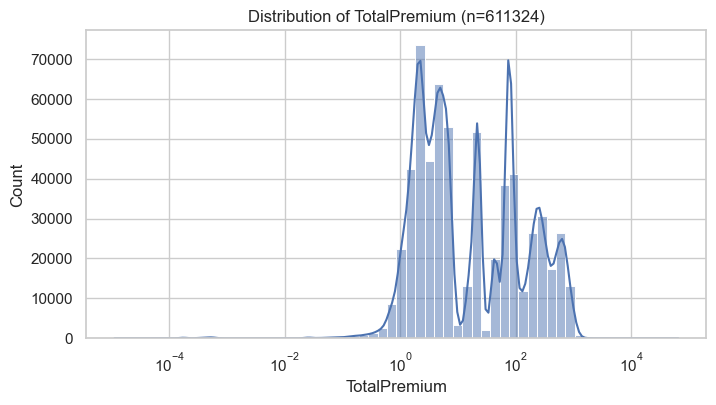

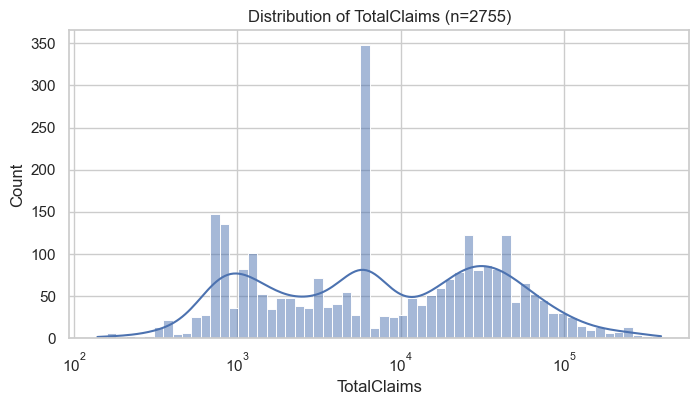

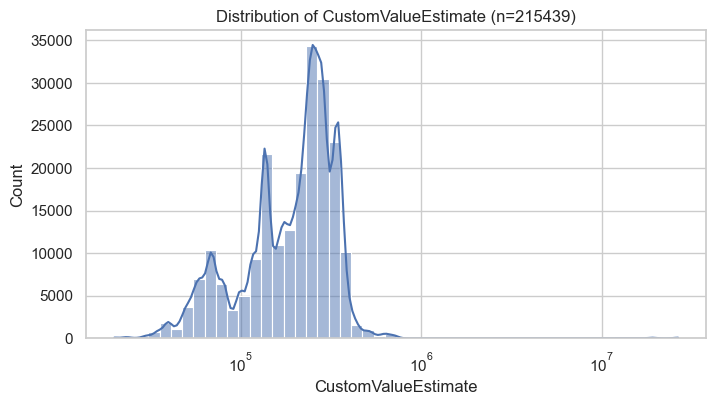

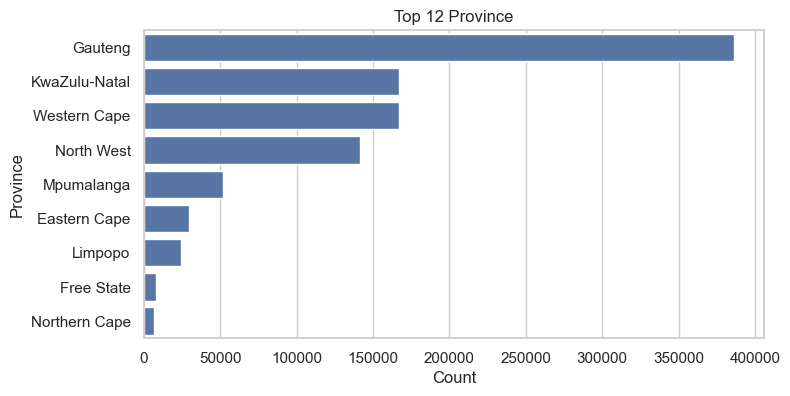

In [4]:
# TotalPremium distribution
fig1 = hist_numeric(df, "TotalPremium", bins=60, log_scale=True)
fig1.show()

# TotalClaims distribution
fig2 = hist_numeric(df, "TotalClaims", bins=60, log_scale=True)
fig2.show()

# CustomValueEstimate
if "CustomValueEstimate" in df.columns:
    fig3 = hist_numeric(df, "CustomValueEstimate", bins=50, log_scale=True)
    fig3.show()

# Top Provinces
fig4 = bar_top_categories(df, "Province", top_n=12)
fig4.show()


d:\AI mastery\Insurance-Risk-Analytics-Predictive-Modeling\src\visualization.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\3548352159.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


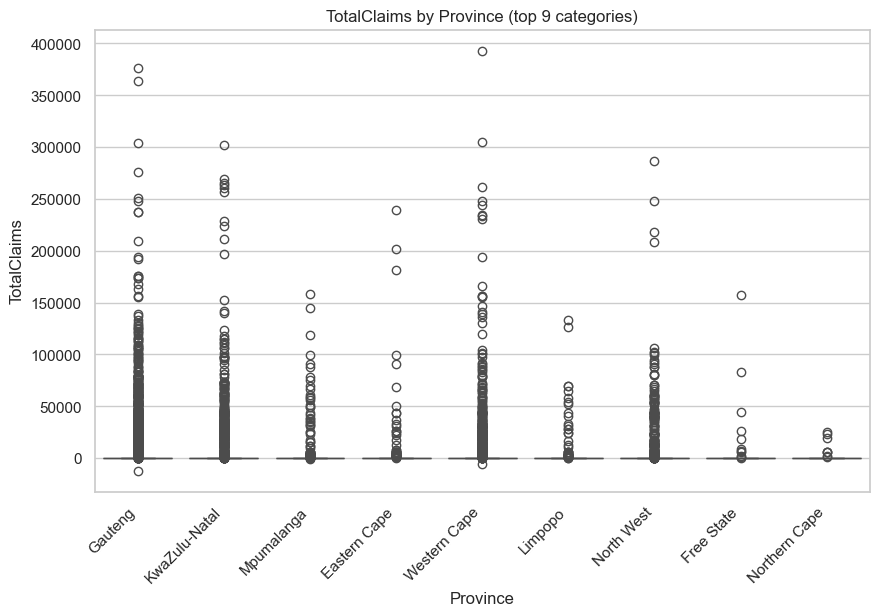

In [5]:
outliers = detect_outliers_iqr(df, cols=["TotalPremium","TotalClaims","CustomValueEstimate"])
outliers
# Boxplot for TotalClaims by Province (top provinces)
fig_bp = boxplot_by_category(df, "TotalClaims", "Province", max_categories=12)
fig_bp.show()


C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2915038256.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  corr_fig.show()
C:\Users\YASMIN\AppData\Local\Temp\ipykernel_20092\2915038256.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ts_fig.show()


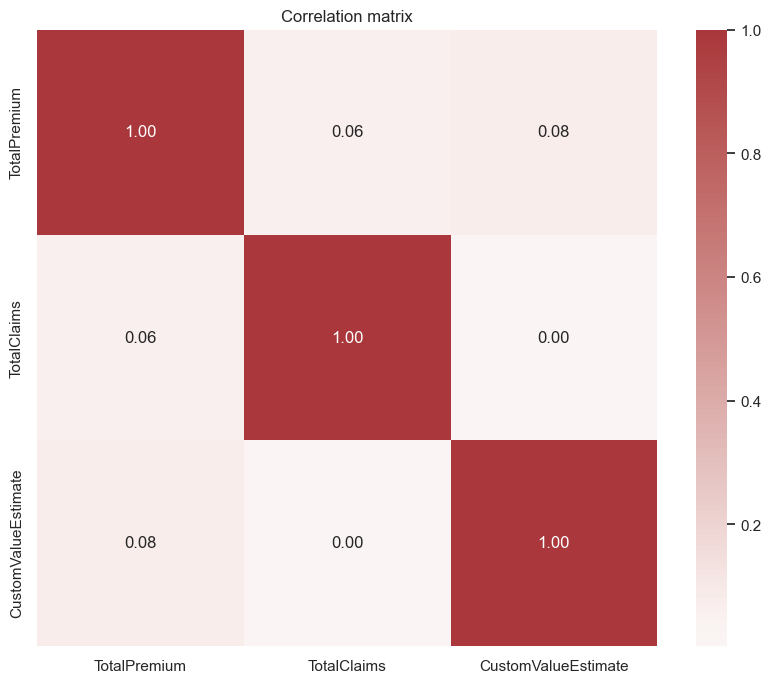

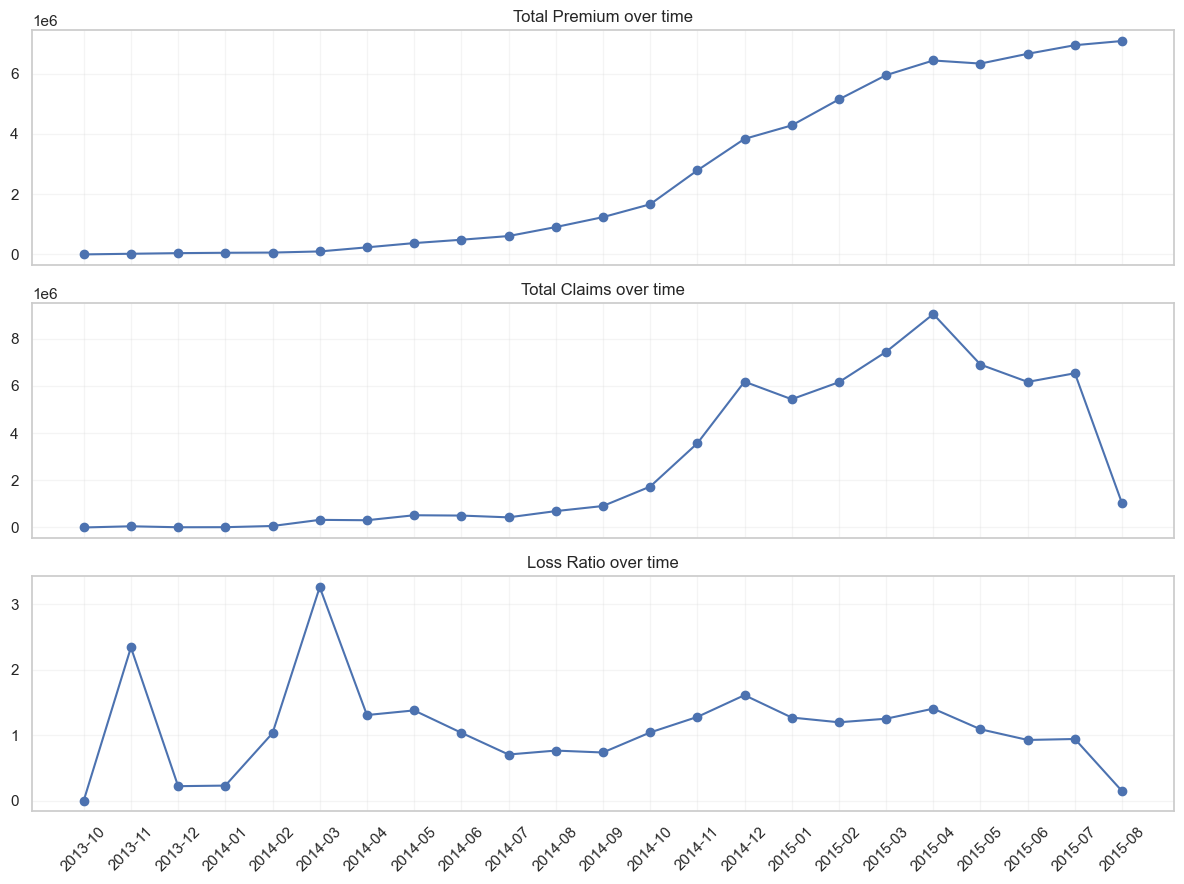

In [6]:
num_cols = ["TotalPremium","TotalClaims","CustomValueEstimate"]
corr = correlation_matrix(df, numeric_cols=[c for c in num_cols if c in df.columns])
corr_fig = correlation_heatmap(corr)
corr_fig.show()

monthly = monthly_aggregates(df)
monthly
ts_fig = timeseries_small_multiples(monthly)
ts_fig.show()


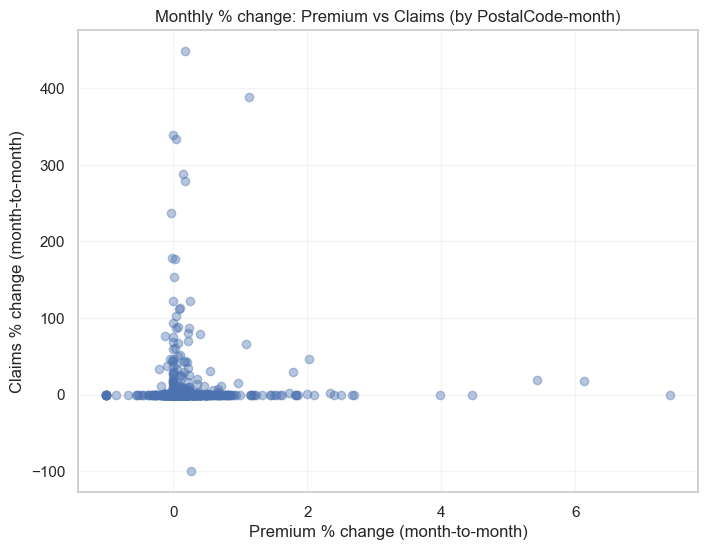

In [7]:
zip_month = monthly_by_zip_scatter(df, zipcode_col="PostalCode")
# example scatter: premium_pct_change vs claims_pct_change (drop NaNs)
tmp = zip_month.dropna(subset=["premium_pct_change","claims_pct_change"])
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(tmp["premium_pct_change"], tmp["claims_pct_change"], alpha=0.4)
plt.xlabel("Premium % change (month-to-month)")
plt.ylabel("Claims % change (month-to-month)")
plt.title("Monthly % change: Premium vs Claims (by PostalCode-month)")
plt.grid(alpha=0.2)
plt.show()


In [8]:
top_makes, top_models = top_makes_models(df, by="total_claims", top_n=15)
top_makes.head()
top_models.head()


,MakeModel,total_claims,total_premium,n_policies,loss_ratio
293,Unknown - QUANTUM 2.7 SESFIKILE 16s,1.191092e+07,1.358622e+07,1784,0.876691
292,Unknown - QUANTUM 2.7 SESFIKILE 15s,1.116799e+07,1.059428e+07,1511,1.054152
291,Unknown - QUANTUM 2.7 SESFIKILE 14s,9.949052e+06,7.861421e+06,1215,1.265554
287,Unknown - QUANTUM 2.5 D-4D SESFIKILE 16s,7.666635e+06,7.479801e+06,955,1.024979
219,Unknown - HiACE SUPER 16 F/Lift,3.275205e+06,3.124616e+06,618,1.048194


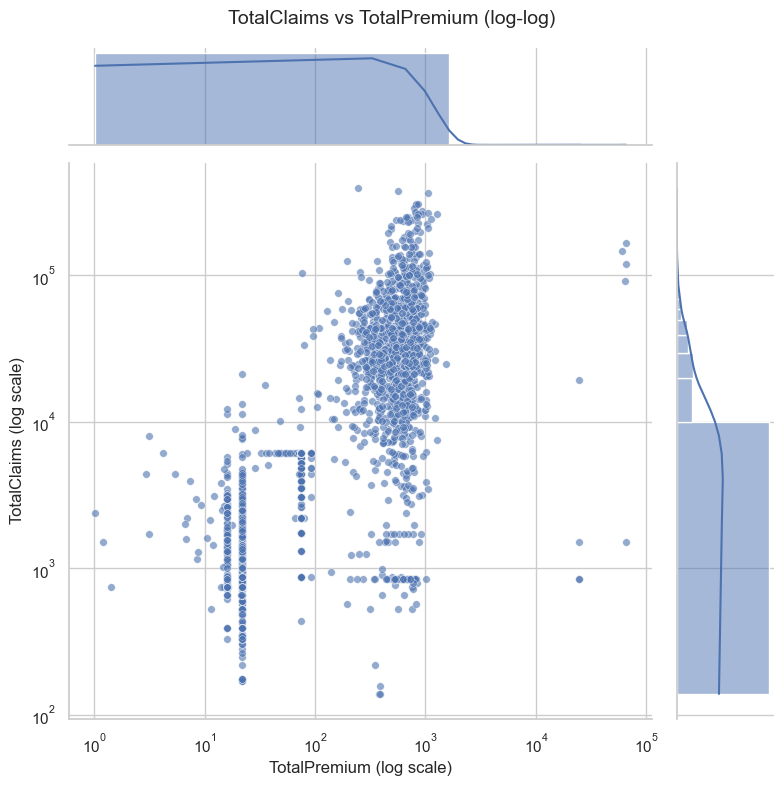

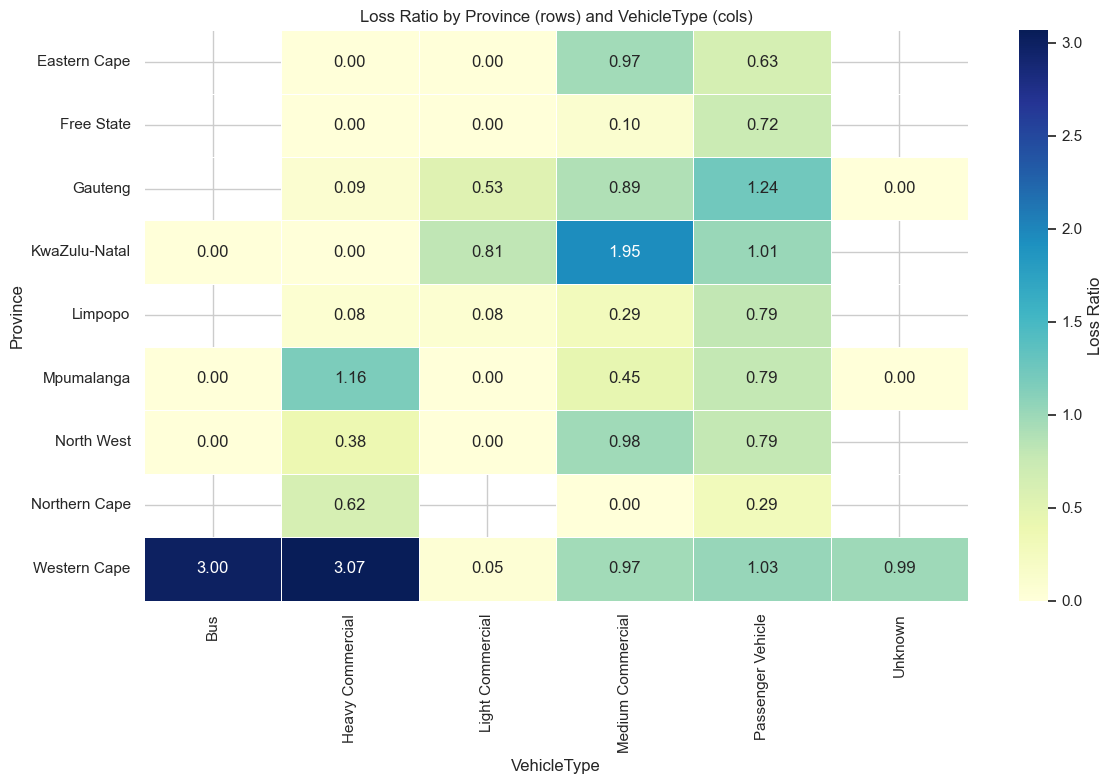

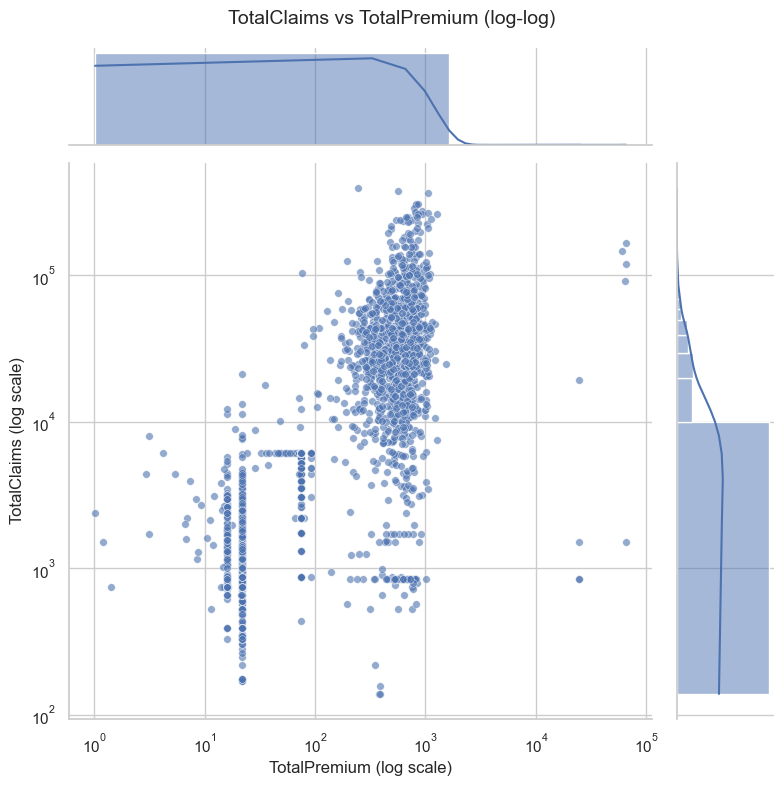

In [9]:
lossratio_heatmap_by_province_vehicle(df)

# Log-scaled scatter plot of Premium vs Claims
joint_log_scatter_premium_claims(df)

In [14]:

from src.statistics_checker import StatisticalDistributionChecker

checker = StatisticalDistributionChecker()

report = checker.analyze_dataframe(df)
report.head(20)


d:\AI mastery\Insurance-Risk-Analytics-Predictive-Modeling\src\statistics_checker.py:30: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "skewness": skew(s),
d:\AI mastery\Insurance-Risk-Analytics-Predictive-Modeling\src\statistics_checker.py:31: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  "kurtosis": kurtosis(s),


,count,mean,std,skewness,kurtosis,normality_test,normality_p_value,normality_is_normal,poisson_vmr,poisson_like,interpretation
UnderwrittenCoverID,981812,104552.003203,63379.965079,0.61387,0.026837,Anderson-Darling,NaN,False,38421.262628,False,Not normally distributed → use Spearman or non...
PolicyID,981812,7933.427876,5293.650055,0.740053,0.284153,Anderson-Darling,NaN,False,3532.23491,False,Not normally distributed → use Spearman or non...
PostalCode,981812,3013.032731,2647.930625,0.804818,-0.623237,Anderson-Darling,NaN,False,2327.069508,False,Not normally distributed → use Spearman or non...
RegistrationYear,981812,2010.217962,3.26173,-0.787861,0.589755,Anderson-Darling,NaN,False,0.005292,False,Not normally distributed → use Spearman or non...
Cylinders,981260,4.046798,0.295121,5.689983,71.22291,Anderson-Darling,NaN,False,0.021522,False,Not normally distributed → use Spearman or non...
cubiccapacity,981260,2466.185808,444.049136,3.601349,102.353023,Anderson-Darling,NaN,False,79.953276,False,Not normally distributed → use Spearman or non...
NumberOfDoors,981260,4.018913,0.468462,-2.550011,18.925089,Anderson-Darling,NaN,False,0.054606,False,Not normally distributed → use Spearman or non...
CustomValueEstimate,215439,225322.12031,570842.428154,40.447862,1724.689994,Anderson-Darling,NaN,False,1446201.009172,False,Not normally distributed → use Spearman or non...
CapitalOutstanding,981810,61002.071585,519978.967627,51.661952,2792.169037,Anderson-Darling,NaN,False,4432277.7858,False,Not normally distributed → use Spearman or non...
NumberOfVehiclesInFleet,0,NaN,NaN,NaN,NaN,No data,NaN,False,NaN,False,Not normally distributed → use Spearman or non...
